In [1]:
import pandas as pd 
import seaborn as sns

In [2]:
df = pd.read_csv('LoanData.csv', low_memory=False)
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,PartyId,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2022-06-11,66AE108B-532B-4BB3-BAB7-0019A46412C1,483449,2016-03-23 16:07:19,2016-03-23 16:07:19,970,1150.0,5.0,{EBF05573-554D-4A3B-BC77-A2CF00B7D110},False,...,0.0,2019-10-28,2020-01-27,NaN,NaN,NaN,NaN,0.00,63.11,16-30
1,2022-06-11,A6635EA6-2F39-4DEA-AA3B-001C9521BE7C,2819530,2022-05-31 15:11:34,2022-05-31 18:11:34,16,0.0,0.0,{F6507F91-F992-41FA-BB4C-AC37009B3E58},False,...,0.0,NaN,NaN,2022-07-11,2.0,60.0,NaN,NaN,NaN,NaN
2,2022-06-11,D152382E-A50D-46ED-8FF2-0053E0C86A70,378148,2015-06-25 11:02:28,2015-06-25 11:02:28,1295,0.0,1705.0,{46C6CBA4-0FBE-44AD-9304-A3EF0111A5FB},False,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,136.62,16-30
3,2022-06-11,87342E13-66CB-483F-833A-007953E50C78,451831,2016-01-14 10:00:21,2016-01-14 10:00:21,2700,565.0,5835.0,{CA64DA9B-8E95-450E-9EFE-A58601016DB2},True,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,259.67,1659.60,180+
4,2022-06-11,87227056-6BF9-410C-98D1-008F788E122A,349381,2015-03-24 15:55:44,2015-03-24 15:55:44,1115,0.0,385.0,{F08F654D-DB2E-4C4B-8C90-A46100FCE7B6},True,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,215.05,180+


In [3]:
len(df)

240440

In [4]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240440 entries, 0 to 240439
Data columns (total 112 columns):
 #    Column                                  Non-Null Count   Dtype  
---   ------                                  --------------   -----  
 0    ReportAsOfEOD                           240440 non-null  object 
 1    LoanId                                  240440 non-null  object 
 2    LoanNumber                              240440 non-null  int64  
 3    ListedOnUTC                             240440 non-null  object 
 4    BiddingStartedOn                        240440 non-null  object 
 5    BidsPortfolioManager                    240440 non-null  int64  
 6    BidsApi                                 240440 non-null  float64
 7    BidsManual                              240440 non-null  float64
 8    PartyId                                 240440 non-null  object 
 9    NewCreditCustomer                       240440 non-null  bool   
 10   LoanApplicationStartedDate    

In [5]:
pd.options.display.max_rows = 4000
unique = df.nunique()
unique

ReportAsOfEOD                                  1
LoanId                                    240440
LoanNumber                                240440
ListedOnUTC                               239171
BiddingStartedOn                          239172
BidsPortfolioManager                        5814
BidsApi                                     1287
BidsManual                                  4461
PartyId                                   111401
NewCreditCustomer                              2
LoanApplicationStartedDate                239304
LoanDate                                    4367
ContractEndDate                             4670
FirstPaymentDate                            2691
MaturityDate_Original                       3859
MaturityDate_Last                           4630
ApplicationSignedHour                         24
ApplicationSignedWeekday                       7
VerificationType                               5
LanguageCode                                  13
Age                 

In [6]:
df['VerificationType']

0         4.0
1         4.0
2         1.0
3         4.0
4         3.0
         ... 
240435    1.0
240436    1.0
240437    1.0
240438    4.0
240439    4.0
Name: VerificationType, Length: 240440, dtype: float64

selecting the relevant columns after reading the dataset description

In [7]:
df = df[['Age', 'Gender', 'VerificationType','NewCreditCustomer', 'AppliedAmount', 
'UseOfLoan','MonthlyPayment', 'Country', 'Interest','LoanDuration', 'Education', 'MaritalStatus', 'NrOfDependants', 
'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'WorkExperience', 'OccupationArea', 
'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 
'DebtToIncome', 'FreeCash', 'CreditScoreEsMicroL', 'CreditScoreEsEquifaxRisk', 
'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini', 'NoOfPreviousLoansBeforeLoan', 
'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan', 'PreviousEarlyRepaymentsBefoleLoan',
'PreviousEarlyRepaymentsCountBeforeLoan', 'DefaultDate', 'Status']]

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240440 entries, 0 to 240439
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age                                     240440 non-null  int64  
 1   Gender                                  240395 non-null  float64
 2   VerificationType                        240390 non-null  float64
 3   NewCreditCustomer                       240440 non-null  bool   
 4   AppliedAmount                           240440 non-null  float64
 5   UseOfLoan                               240440 non-null  int64  
 6   MonthlyPayment                          233750 non-null  float64
 7   Country                                 240440 non-null  object 
 8   Interest                                240440 non-null  float64
 9   LoanDuration                            240440 non-null  int64  
 10  Education                               2403

checking the number of missing values

In [9]:
df.isnull().sum()

Age                                            0
Gender                                        45
VerificationType                              50
NewCreditCustomer                              0
AppliedAmount                                  0
UseOfLoan                                      0
MonthlyPayment                              6690
Country                                        0
Interest                                       0
LoanDuration                                   0
Education                                     50
MaritalStatus                                 50
NrOfDependants                            204840
EmploymentStatus                             202
EmploymentDurationCurrentEmployer           3358
WorkExperience                            203918
OccupationArea                                91
HomeOwnershipType                           1657
IncomeTotal                                    0
ExistingLiabilities                            0
LiabilitiesTotal    

Exploring the status column

In [10]:
df['Status'].unique()

array(['Late', 'Current', 'Repaid'], dtype=object)

In [11]:
df.isnull().sum()

Age                                            0
Gender                                        45
VerificationType                              50
NewCreditCustomer                              0
AppliedAmount                                  0
UseOfLoan                                      0
MonthlyPayment                              6690
Country                                        0
Interest                                       0
LoanDuration                                   0
Education                                     50
MaritalStatus                                 50
NrOfDependants                            204840
EmploymentStatus                             202
EmploymentDurationCurrentEmployer           3358
WorkExperience                            203918
OccupationArea                                91
HomeOwnershipType                           1657
IncomeTotal                                    0
ExistingLiabilities                            0
LiabilitiesTotal    

Get the percentage of missing values for each column 

In [12]:
pd.set_option('display.max_rows', None)
df.isnull().sum()/len(df)* 100

Age                                        0.000000
Gender                                     0.018716
VerificationType                           0.020795
NewCreditCustomer                          0.000000
AppliedAmount                              0.000000
UseOfLoan                                  0.000000
MonthlyPayment                             2.782399
Country                                    0.000000
Interest                                   0.000000
LoanDuration                               0.000000
Education                                  0.020795
MaritalStatus                              0.020795
NrOfDependants                            85.193811
EmploymentStatus                           0.084013
EmploymentDurationCurrentEmployer          1.396606
WorkExperience                            84.810348
OccupationArea                             0.037847
HomeOwnershipType                          0.689153
IncomeTotal                                0.000000
ExistingLiab

### Dropping columns with lots of missing values. 

For loans that are late, they cannot be classified as defaulted because although the repayment is just late and not defaulted. A loan becomes defaulted when the borrower fails to make payment 60 days after the grace period (according to https://ccr.equifax.com.au/resources/explaining-the-difference-between-a-late-payment-and-a-default-to-your-customers#:~:text=Repayment%20history%20information%20is%20recorded,was%20in%20a%20specific%20month.&text=A%20payment%20later%20than%2060%20days%20is%20a%20default.) Since this date can only be defined by the loan company, this might be difficult to achieve. However, the loan company has provided us with a Defaultdate column which is the date the loan went into defaulted state. 

This means for rows or borrowers that have a default date, the borrower is assumed to have defaulted the payment of the loan. This means that the default date is what will be used to determine whether a borrower has defaulted a loan or not. This also means that the defaultdate column cannot be dropped. 

In [13]:
df = df.drop(columns=['NrOfDependants', 'WorkExperience', 'CreditScoreEsMicroL', 
'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini', 
'PreviousRepaymentsBeforeLoan', 'PreviousEarlyRepaymentsBefoleLoan'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240440 entries, 0 to 240439
Data columns (total 27 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Age                                     240440 non-null  int64  
 1   Gender                                  240395 non-null  float64
 2   VerificationType                        240390 non-null  float64
 3   NewCreditCustomer                       240440 non-null  bool   
 4   AppliedAmount                           240440 non-null  float64
 5   UseOfLoan                               240440 non-null  int64  
 6   MonthlyPayment                          233750 non-null  float64
 7   Country                                 240440 non-null  object 
 8   Interest                                240440 non-null  float64
 9   LoanDuration                            240440 non-null  int64  
 10  Education                               2403

Creating the default column using the rows that have a defaultdate value

In [14]:
df['DefaultDate'].isnull()


df['Default'] = df['DefaultDate'].fillna('').apply(lambda x: 0 if x=='' else 1)
df['Default'].value_counts()

0    159123
1     81317
Name: Default, dtype: int64

This means 150123 borrowers did not default on their loan since their default date is null. This is also confirmed below.

0 = Did not default
1 = Defaulted

In [15]:
df['DefaultDate'].isnull().sum()

159123

In [16]:
df.corr()

,Age,Gender,VerificationType,NewCreditCustomer,AppliedAmount,UseOfLoan,MonthlyPayment,Interest,LoanDuration,Education,...,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
Age,1.000000,0.033175,-0.030722,-0.049172,0.089733,-0.092404,0.048114,-0.046524,0.066457,0.083127,...,0.018240,0.069228,0.003467,-0.029197,-0.056444,-0.013912,0.045538,0.099155,-0.000702,0.007479
Gender,0.033175,1.000000,0.125324,0.111295,-0.027141,0.040499,0.008426,0.171666,0.065948,0.069278,...,-0.013153,-0.052656,0.004323,0.034473,0.066555,-0.005442,-0.080302,-0.097857,-0.030940,0.032530
VerificationType,-0.030722,0.125324,1.000000,0.096072,0.038192,-0.151672,-0.042793,0.005632,0.143126,-0.005068,...,0.010687,-0.081974,0.000613,0.039977,-0.080005,-0.068783,-0.120113,-0.082252,-0.053974,-0.138522
NewCreditCustomer,-0.049172,0.111295,0.096072,1.000000,0.088616,0.065061,0.142166,0.226654,-0.033420,-0.069158,...,0.011514,-0.386865,-0.000645,0.054519,0.049394,0.041497,-0.603651,-0.625608,-0.104904,0.112726
AppliedAmount,0.089733,-0.027141,0.038192,0.088616,1.000000,-0.006766,0.789767,-0.030791,0.255787,0.035395,...,0.016015,-0.084835,-0.000917,0.090548,0.114961,0.033975,-0.157201,-0.074147,-0.004650,0.071169
UseOfLoan,-0.092404,0.040499,-0.151672,0.065061,-0.006766,1.000000,0.085239,0.065077,-0.157060,0.059758,...,-0.000067,0.113360,0.003752,0.151395,0.633781,0.247391,-0.088936,-0.117628,0.058524,0.132972
MonthlyPayment,0.048114,0.008426,-0.042793,0.142166,0.789767,0.085239,1.000000,0.239114,-0.069177,0.045869,...,0.021337,-0.139420,-0.000503,0.007548,0.186567,0.032797,-0.182893,-0.130839,-0.005261,0.152767
Interest,-0.046524,0.171666,0.005632,0.226654,-0.030791,0.065077,0.239114,1.000000,-0.013508,0.026497,...,-0.000451,-0.153638,0.003507,0.004340,0.091508,0.017672,-0.193513,-0.205709,-0.029416,0.336683
LoanDuration,0.066457,0.065948,0.143126,-0.033420,0.255787,-0.157060,-0.069177,-0.013508,1.000000,-0.025342,...,-0.004837,-0.023231,-0.001079,-0.034103,-0.109213,-0.040354,0.018137,0.069808,-0.004275,0.000380
Education,0.083127,0.069278,-0.005068,-0.069158,0.035395,0.059758,0.045869,0.026497,-0.025342,1.000000,...,0.005673,0.120116,-0.000998,0.025078,0.064388,0.034846,0.071287,0.097566,0.022171,0.015560


In [17]:
df.columns

Index(['Age', 'Gender', 'VerificationType', 'NewCreditCustomer',
       'AppliedAmount', 'UseOfLoan', 'MonthlyPayment', 'Country', 'Interest',
       'LoanDuration', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'DefaultDate', 'Status',
       'Default'],
      dtype='object')

Since the status column for a new applicant cannot be known, it will be dropped. 

Also, since the default date cannot be known and it has been used to determine if the applicant defaulted or not, it will also be dropped. 

We can also drop the country column as it doesn't really bears no relevance to determining if an individual will default on his/her loan repayment. 

In [18]:
df.drop(columns=['Status', 'DefaultDate'], inplace=True)
len(df.columns)

26

### Data Exploration

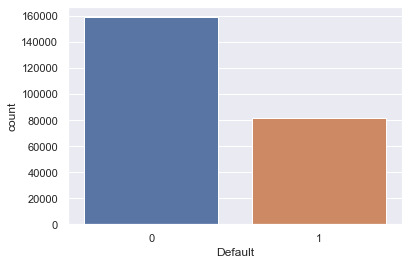

In [19]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='Default', data=df)

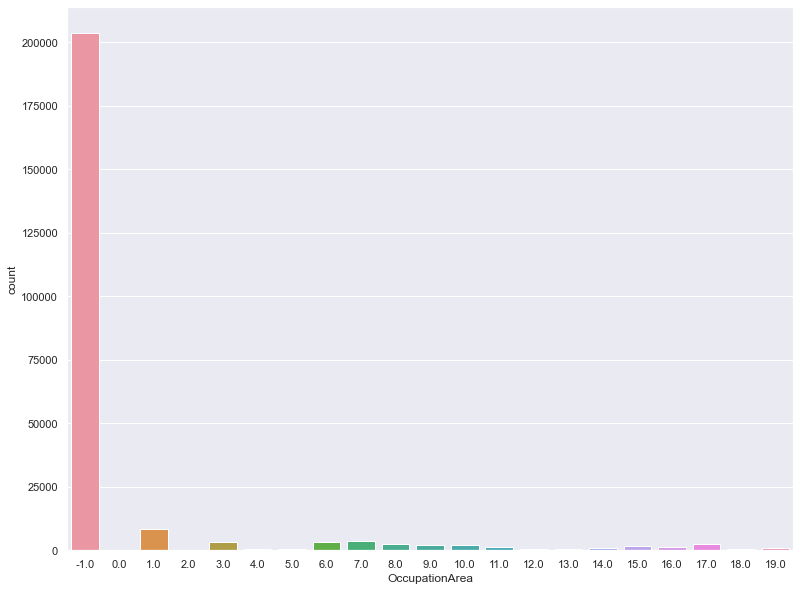

In [20]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='OccupationArea', data=df)

In [21]:
df.columns

Index(['Age', 'Gender', 'VerificationType', 'NewCreditCustomer',
       'AppliedAmount', 'UseOfLoan', 'MonthlyPayment', 'Country', 'Interest',
       'LoanDuration', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Default'],
      dtype='object')

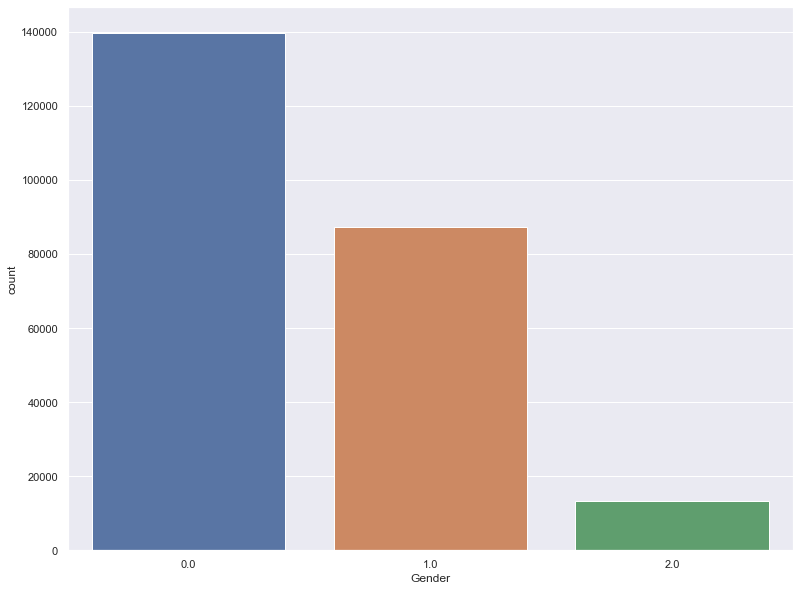

In [22]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,10)})
ax = sns.countplot(x='Gender', data=df)

In [23]:
df['Gender'].value_counts()/len(df)* 100

0.0    58.131758
1.0    36.318832
2.0     5.530694
Name: Gender, dtype: float64

In [24]:
df['Gender'].value_counts()

0.0    139772
1.0     87325
2.0     13298
Name: Gender, dtype: int64

C:\Users\EliteBook\anaconda3\lib\site-packages\seaborn\distributions.py:375: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Default', ylabel='Count'>

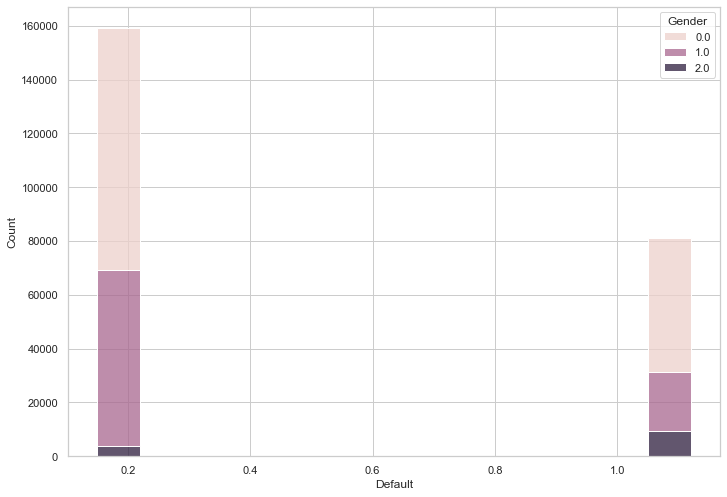

In [25]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

plot = df.groupby(['Default'])['Gender'].value_counts().reset_index(name='count')
sns.histplot(x = 'Default' , hue = 'Gender',weights= 'count',
             multiple = 'stack',data=plot,shrink = 0.7)

In [26]:
df.groupby(['Default'])['Gender'].value_counts().reset_index(name='count')

,Default,Gender,count
0,0,0.0,89878
1,0,1.0,65263
2,0,2.0,3956
3,1,0.0,49894
4,1,1.0,22062
5,1,2.0,9342


In [27]:
len(df[df['Gender']==0])

139772

In [28]:
89878 + 49894

139772

In [34]:
round(len(df[(df['Gender']==0) & (df['Default']==0)])/len(df[(df['Gender']==0)]) *100, 3)

64.303

64% of male borrowers did not default. 

In [37]:
round(len(df[(df['Gender']==1) & (df['Default']==0)])/len(df[(df['Gender']==1)]) *100, 3)

74.736

74% of female borrowers did not default.

In [38]:
round(len(df[(df['Gender']==2) & (df['Default']==0)])/len(df[(df['Gender']==2)]) *100, 3)

29.749

29% of undefined gender borrowers did not default.

In [39]:
round(len(df[(df['Gender']==0) & (df['Default']==1)])/len(df[(df['Gender']==0)]) *100, 3)

35.697

35% of male borrowers defaulted.

In [40]:
round(len(df[(df['Gender']==1) & (df['Default']==1)])/len(df[(df['Gender']==1)]) *100, 3)

25.264

25% of female borrowers defaulted.

In [41]:
round(len(df[(df['Gender']==2) & (df['Default']==1)])/len(df[(df['Gender']==2)]) *100, 3)

70.251